# Chapter 1 - Exploratory Data Analysis 

## Loading Libs 

In [1]:
import gc
import numpy as np
import pandas as pd
from scipy import stats
from dotenv import dotenv_values 
import matplotlib.pyplot as plt

/tmp/ipykernel_25991/2010563328.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Setting paths & vars

In [2]:
config = dotenv_values(".env") #Filepaths
data_path = config['CSV_PATH']
data_name = config['FILE_NAME']

In [3]:
df = pd.read_csv(data_path + data_name)

In [4]:
df.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [5]:
del config
del data_name
del data_path

## Mean, trimmed and median

Mean

In [6]:
df["Population"].mean()

6162876.3

Trimmed Mean, 10%

In [7]:
stats.trim_mean(df["Population"], 0.1)

4783697.125

Median

In [8]:
df.Population.median()

4436369.5

## Standard Deviation, IQR, MAD

Standard Deviation

In [9]:
df.Population.std()

6848235.347401142

IQR

In [10]:
df.Population.quantile(0.75) - df.Population.quantile(0.25)

4847308.0

In [11]:
def MAD(param_name, df):
    mean = df[param_name].mean()
    df["mad_math"] = abs(df[param_name] - mean)
    mad = df["mad_math"].median()
    df = df.drop('mad_math', axis=1)
    return mad

In [12]:
print(MAD("Population", df))

3430658.3


## Data Distribution

Boxplot

In [27]:
boxplot = plt.boxplot(df["Population"] / 1000000, labels=["Population (millions)"])

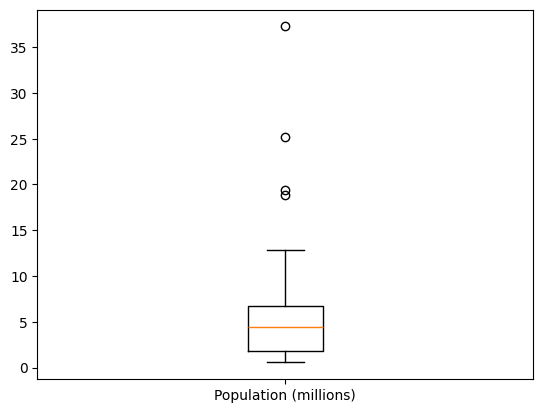

In [28]:
plt.show()

Histogram

In [35]:
ax = df.plot.hist(column=["Population"], bins=10, figsize=(10, 8))

In [36]:
ax

<Axes: ylabel='Frequency'>